In [ ]:
#  Copyright 2017-2020 Reveal Energy Services, Inc
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
# This file is part of Orchid and related technologies.
#

# Example: Plotting treatment curves for a stage

This notebook illustrates using the Orchid* Python API and the pandas package to
plot the treatment curves (treating pressure, slurry rate and proppant concentration)
for a single stage.

(*Orchid is a mark of Reveal Energy Services, Inc)

## 0.5 Import packages

The only import needed for the Python API is `orchid` itself.

In [ ]:
import orchid

The remaining imports are standard python packages to support the analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# The following import is included for its "side-effects" of an improved color schemes and 
# plot styles. (See the "Tip" in section 9.2 of "Python for Data Analysis" for details.)
import seaborn as sns

## 1.0 Load the .ifrac project

The following code simply captures the configured location of the Orchid training data. It is not needed to
use the Orchid Python API itself, but it is used in this example to load well-known data.

In [ ]:
orchid_training_data_path = orchid.training_data_path()

In [ ]:
project = orchid.load_project(str(orchid_training_data_path.joinpath(
    'frankNstein_Bakken_UTM13_FEET.ifrac')))

### 1.1 Get the treatment curves for the stage of interest

In [ ]:
wells = dict([(w.name, w) for w in project.wells])
stages_for_wells = {wn: w.stages for (wn, w) in wells.items()}

well_name = 'Demo_2H'
stage_no = 39
stages_for_well = list(stages_for_wells[well_name])
# Assume I find exactly one.
stage = [s for s in stages_for_well if s.display_stage_number == stage_no][0]
curves = stage.treatment_curves()

curve_names = [orchid.TreatmentCurveTypes.TREATING_PRESSURE,
               orchid.TreatmentCurveTypes.SLURRY_RATE,
               orchid.TreatmentCurveTypes.SURFACE_PROPPANT_CONCENTRATION]
treatment_series = [curves[n].time_series() for n in curve_names]
treatment_curves = pd.concat(treatment_series, axis=1)
treatment_curves.columns = [f'{orchid.TreatmentCurveTypes.TREATING_PRESSURE.value} ({orchid.abbreviation(project.project_units.PRESSURE)})',
                            f'{orchid.TreatmentCurveTypes.SLURRY_RATE.value} ({orchid.abbreviation(project.project_units.SLURRY_RATE)})',
                            f'{orchid.TreatmentCurveTypes.SURFACE_PROPPANT_CONCENTRATION.value}'
                            f' ({orchid.abbreviation(project.project_units.PROPPANT_CONCENTRATION)})']
treatment_curves

,Pressure (psi),Slurry Rate (bpm),Surface Proppant Concentration (lb/gal)
2018-06-24 08:00:00,9052.009549,0.219156,0.258476
2018-06-24 08:00:01,9052.396701,0.219156,0.265952
2018-06-24 08:00:02,9052.764757,0.219156,0.265787
2018-06-24 08:00:03,9052.094618,0.344388,0.264544
2018-06-24 08:00:04,9050.600694,1.554963,0.258026
...,...,...,...
2018-06-24 09:44:48,14.589532,1.659323,-0.244489
2018-06-24 09:44:49,14.649874,1.659323,-0.245870
2018-06-24 09:44:50,14.707184,1.659323,-0.244468
2018-06-24 09:44:51,14.721363,1.659323,-0.241381


### 1.2 Plot the three treatment curves

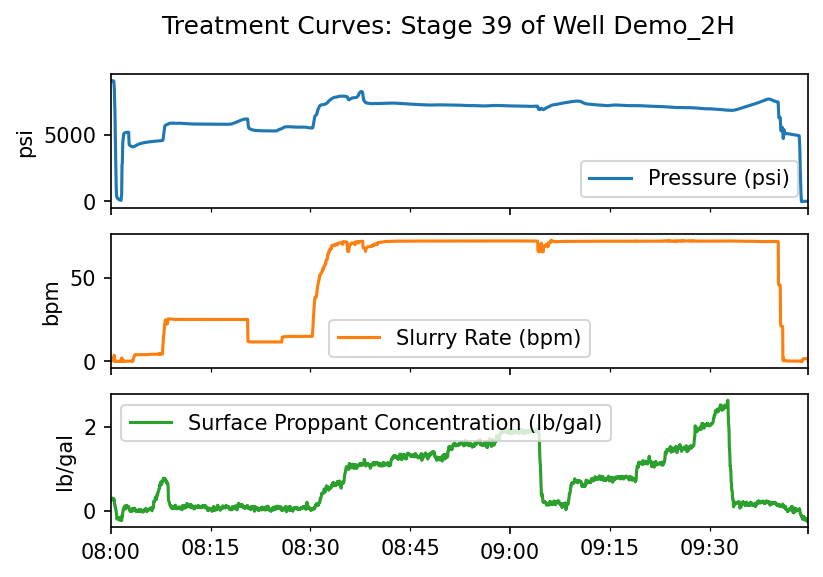

In [ ]:
axes = treatment_curves.plot(subplots=True,
                             title=f'Treatment Curves: Stage {stage_no} of Well {well_name}')

axes[0].set_ylabel(f'{orchid.abbreviation(project.project_units.PRESSURE)}')
axes[1].set_ylabel(f'{orchid.abbreviation(project.project_units.SLURRY_RATE)}')
axes[2].set_ylabel(f'{orchid.abbreviation(project.project_units.PROPPANT_CONCENTRATION)}')

plt.rcParams['figure.dpi'] = 150
plt.show()